<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/OpenCV_%EC%B9%B4%EB%A9%94%EB%9D%BC%EC%8A%A4%ED%8B%B0%EC%BB%A4_%EC%95%B1_%EB%A7%8C%EB%93%A4%EA%B8%B0(dlib%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OpenCV(Open Source Computer Vision Library)

1.   500여개 이상의 함수와 알고리즘
2.   Computer Vision, Image Processing을 할 수 있음


#dlib face predict data 다운로드

In [ ]:
# download data
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

#2. opencv로 이미지 읽어오기

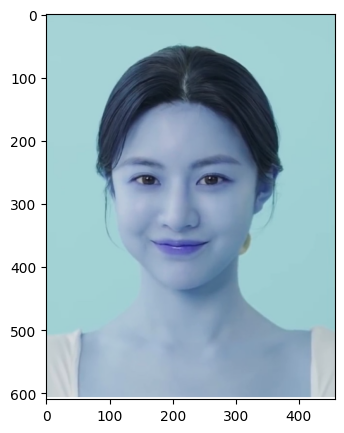

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

image_path = "test.png"
img_bgr = cv2.imread(image_path)		# openCV로 이미지를 불러온기
img_show = img_bgr.copy()				# 출력용 이미지를 따로 저장하기
plt.imshow(img_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 변경
# opencv는 RGB 대신 BGR을 사용하기 때문에 RGB로 변경해주어야 한다.

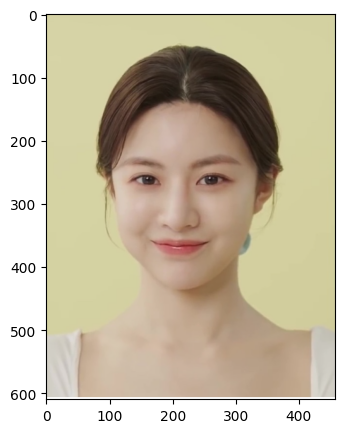

In [ ]:
# plt.imshow 이전에 RGB 값을 설정해줘야 한다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#3. 얼굴 인식

rectangles[[(92, 192) (315, 415)]]


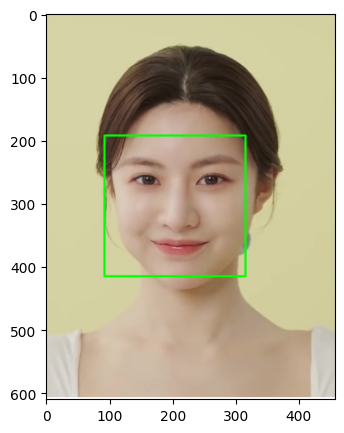

In [ ]:
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있음
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#4. 얼굴 랜드마크 (Face Landmark)

이목구비의 위치를 추론하는 것을 face landmark localization 기술이라고 한다. face landmark는 detection의 결과물인 bounding box로 잘라낸(crop) 얼굴 이미지를 이용한다.
*   Object keypoint estimation 알고리즘 : 객체 내부의 점을 찾는 기술
*   top-down : bounding box를 찾고 box 내부의 keypoint를 예측
*   bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성
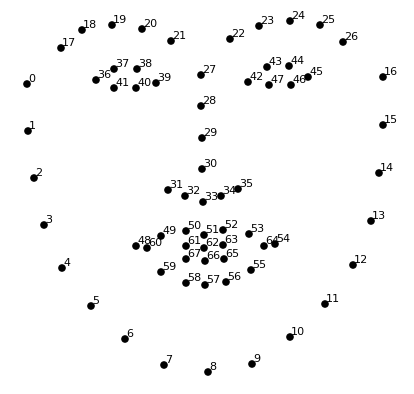

In [ ]:
#랜드마크 모델 불러오기
landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아낸다
for dlib_rect in dlib_rects:
	points = landmark_predictor(img_rgb, dlib_rect)
	# face landmark 좌표를 저장
	list_points = list(map(lambda p: (p.x, p.y), points.parts()))
	list_landmarks.append(list_points)

print(len(list_landmarks[0]))



68


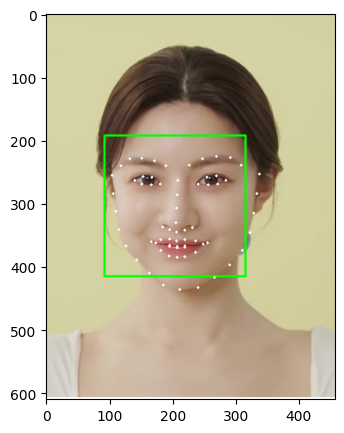

In [ ]:
#랜드마크 출력

for landmark in list_landmarks:
	for point in landmark:
		cv2.circle(img_show, point, 2, (255, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#5. 스티커 적용하기

###스티커를 코 기준으로 맞춤

In [ ]:
#좌표 찾기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print('(x,y) : (%d, %d)'%(x,y))
    print('(w,h) : (%d, %d)'%(w,h))

(205, 330)
(x,y) : (205, 218)
(w,h) : (224, 224)


In [ ]:
sticker_path = 'crown.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print(img_sticker.shape)

(224, 224, 3)


In [ ]:
refined_x = x-w//2
refined_y = y-h
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print('(x,y) : (%d, %d)'%(refined_x, refined_y))

(x,y) : (93,-6)
(x,y) : (93, 0)


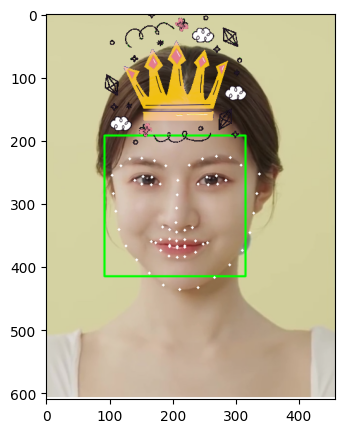

In [ ]:
# 너무 복잡해 보인다 하지만 단순한 img_show[from:to] 형식이다.
king_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,king_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

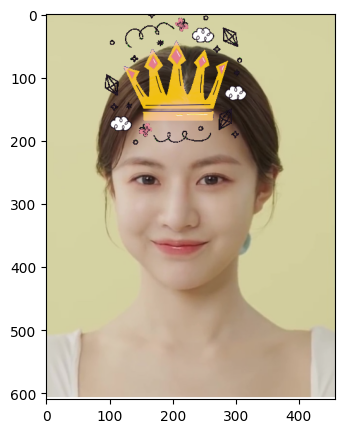

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#연습문제> 고양이 수염 스티커 만들기

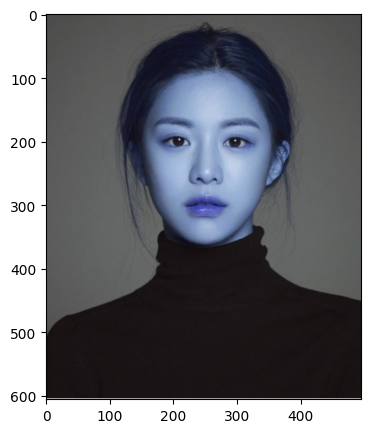

In [ ]:
#이미지 불러오기



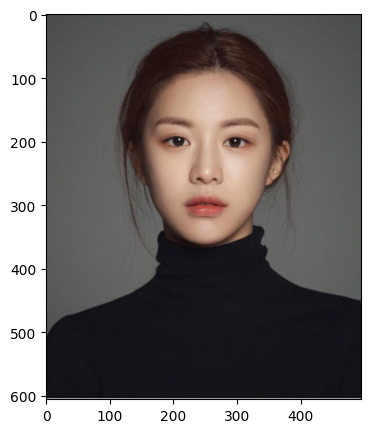

In [ ]:
#BGR--> RGB로 변경



rectangles[[(142, 142) (365, 365)]]


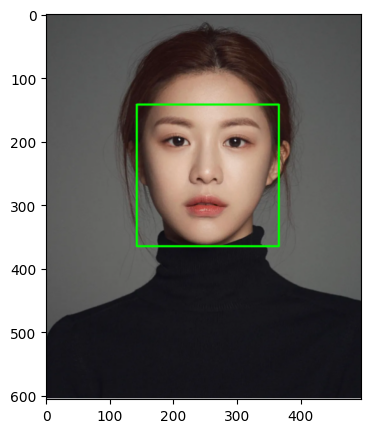

In [ ]:
#얼굴영역 찾기


In [ ]:
# landmark 모델 불러오기




68


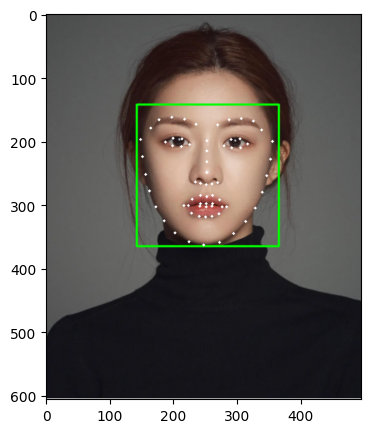

In [ ]:
# landmark 출력




In [ ]:
# 좌표 확인




(252, 249)
(x,y) : (252, 137)
(w,h) : (224, 224)


(224, 224, 3)


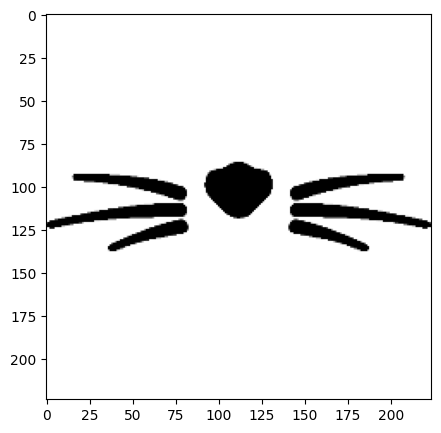

In [ ]:
# 스티커 이미지 Read





In [ ]:
#좌표 조정



(x,y) : (140,137)
(x,y) : (140, 137)


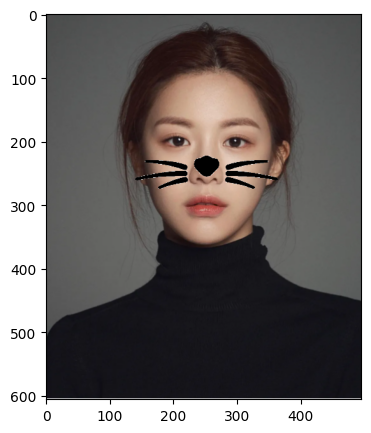

In [ ]:
# bounding box 제거 후 이미지



#만약 얼굴이 정면이 아니라면 각도를 조절해야함(생각해보기)